# Aula 3 Regularização e Problemas do Gradiente Descendente

## Temas:
- Problemas do gradiente (vanish e exploding)
- Underfit e Overfit
- Regularização de Redes Neurais

## Problema do vanishing-gradient

O problema do gradiente de fuga (vanishing gradient) é encontrado ao __treinar redes neurais profundas__, com métodos de aprendizado baseados em gradiente e backpropagation. Em tais métodos, durante cada iteração de treinamento, cada um dos pesos da rede neural recebe uma atualização proporcional à derivada parcial da função de custo em relação ao peso atual. O problema é que, em alguns casos, __o gradiente será muito pequeno, impedindo efetivamente que o peso altere seu valor__. Na pior das hipóteses, isso __pode impedir completamente o treinamento__ da rede neural. 

Por exemplo, a função tangente hiperbólica tem gradientes no intervalo -1 a 1 e a sigmóide de 0 à 1 e como o backpropagation calcula gradientes pela regra da cadeia isso tem o efeito de multiplicar n desses pequenos números para calcular gradientes das camadas iniciais em uma rede de n camadas, o que significa que o gradiente diminui exponencialmente enquanto as camadas iniciais treinam muito lentamente.

O resultado é um aprendizado lento, especialmente das primeiras camadas da rede.

[Wikipedia](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)

<center>
<img src=https://i0.wp.com/neptune.ai/wp-content/uploads/Vanishing-and-Exploding-Gradients-in-Neural-Network-Models-Debugging-Monitoring-and-Fixing-Practical-Guide_7.png width=450 text="https://neptune.ai/blog/vanishing-and-exploding-gradients-debugging-monitoring-fixing">


<img src=https://i.stack.imgur.com/lVKg7.png text=https://stats.stackexchange.com/questions/432300/help-understanding-vanishing-and-exploding-gradients width=600>

</center>

$$w_j^{(i)} \larr w_j^{(i)} - \alpha \frac{∂l}{∂w^{(i)}_{j}}$$

$$ \frac{∂l}{∂w^{(1)}_{1,1}}=\frac{∂l}{∂o}⋅\frac{∂o}{∂a^{(2)}_1}⋅\frac{∂a^{(2)}_1}{∂a^{(1)}_1}⋅\frac{∂a^{(1)}_1}{∂w^{(1)}_{1,1}}+\frac{∂l}{∂o}⋅\frac{∂o}{∂a^{(2)}_2}⋅\frac{∂a^{(2)}_2}{∂a^{(1)}_1}⋅\frac{∂a^{(1)}_1}{∂w^{(1)}_{1,1}} $$

In [1]:
# Suponha que o gradiente fosse 0.9 em uma rede com 100 camadas
# ao multiplicar esse valor 100x temos
0.9**100

2.6561398887587544e-05

In [2]:
# novo peso = peso anterior - learning rate * gradiente
novo_peso = 2.0 - 1 * (0.9**100)
novo_peso

1.9999734386011123

Se o gradiente é muito pequeno, ele influenciará pouco na atualização dos pesos, impactando no tempo de aprendizagem.

Como identificar vanishing gradient
- os parâmetros das últimas camadas sobrem mudanças grandes enquanto as primeiras quase não mudam
- o modelo demora para aprender e o treino para após poucas iterações 
- performance do modelo é ruim


Soluções:

- Diminuir o tamanho da rede neural
- Utilizar outras funções de ativação como a ReLU
- Long short-term memory Networks (LSTM)
- Batch Normalization (BN)

#### Exemplo de análise que podemos fazer para avaliar o vanishing gradient

<center>
<img src=https://machinelearningmastery.com/wp-content/uploads/2021/11/vanishing-plot-sigmoid.png width=500 text="https://machinelearningmastery.com/visualizing-the-vanishing-gradient-problem/">
</center>

No gráfico temos os dados dos pesos de cada uma das 5 camadas (cores) com função de ativação sigmóide realizadas no treinamento de 100 epochs (eixo x). No primeiro temos a média dos pesos, no segundo o desvio padrão e no terceiro o Loss ao longo das 100 epochs.

## Problema do exploding-gradient

O oposto pode acontecer quando a função de ativação não possui um limite máximo. A multiplicação devido ao gradiente ao longo da rede neural pode fazer os valores explodirem. No pior dos casos os pesos acabam recebendo valores NaN e não conseguem mais ser atualizados.

O resultado é um modelo instável (em cada update a função perda varia muito) com grandes alterações a cada atualização.

<img src=https://miro.medium.com/max/1400/1*_YRWJr-jF7tKnmUq-e3ltw.png width=500 text="https://medium.com/@ayushch612/vanishing-gradient-and-exploding-gradient-problems-7737c0aa535f">

In [3]:
# novo peso = peso anterior - learning rate * gradiente
novo_peso = 2.0 - 1*1000
novo_peso

-998.0

Como identificar um gradient exploding:

- a atualização dos pesos fica muito instável entre cada treino de batch/iteração
- os parâmetros das primeiras camadas sobrem mudanças grandes enquanto das últimas mudam bem menos
- pode haver o aparecimento de parâmetros nans
- a loss function também pode ser nan

Soluções:

- Diminuir o tamanho da rede neural
- Setar um valor máximo para o gradiente (Gradient clipping)
- Verificar o tamanho dos pesos da rede e aplicar uma penalidade à função de perda (loss function) para valores de peso ($W$) grandes. Isso pode ser feito com as famosas regularização L1 (pesos absolutos) ou L2 (pesos quadrados).
Batch Normalization (BN)

## Underfit e Overfit

<center>
<img src=https://i.pinimg.com/564x/72/e2/22/72e222c1542539754df1d914cb671bd7.jpg width=500>
</center>

Já sabemos como aumentar a complexidade da nossa rede neural e sair de um problema de underfiting. Mas o que fazer quando estamos overfittando nosso modelo?


## Regularização de Redes Neurais

### Regularização L1 e L2

Assim como nos modelos clássicos de ML, aqui podemos adicionar um regularizador de pesos L1 ou L2 ao calcular a função perda. 

[Regularizadores disponíveis no Keras](https://keras.io/api/layers/regularizers)


### Dropout
O Dropout consiste em desativar, ou dropar, alguns neurônios randomicamente durante o treino. Isso evita que a rede torne-se muito dependente de alguns únicos neurônios, já que a rede neural não pode contar com ele todo o tempo. Isso torna o aprendizado da rede muito mais balanceado e reduz o overfiting.

O *dropout_rate* indica quantos % dos neurônios daquela camada serão desligados aleatoriamente a cada conjunto de treino (batch) e seu valor, geralmente, fica entre 0.2 e 0.5.

Atenção: o drop de neurônios só acontece no treino. No teste e validação não!

<img src=https://www.i2tutorials.com/wp-content/media/2019/09/Deep-learning-41-i2tutorials.png width=500>

In [4]:
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Fonte dos dados: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
def preprocessing_text(input_text):
    input_text = re.sub(r'@\w+', '', input_text)

    stopwords_list = stopwords.words('english')
    keep_list = ["n't", "not", "no"]

    words = input_text.split()
    clean_words = [word for word in words if (word not in stopwords_list or word in keep_list) and len(word) > 1]

    return " ".join(clean_words)

In [7]:
df = df[['airline_sentiment', 'text']]

df.text = df.text.apply(preprocessing_text)

In [8]:
df.head(10)

,airline_sentiment,text
0,neutral,What said.
1,positive,plus added commercials experience... tacky.
2,neutral,today... Must mean need take another trip!
3,negative,"really aggressive blast obnoxious ""entertainme..."
4,negative,really big bad thing
5,negative,seriously would pay $30 flight seats playing. ...
6,positive,"yes, nearly every time fly VX “ear worm” won’t..."
7,neutral,Really missed prime opportunity Men Without Ha...
8,positive,"Well, didn't…but NOW DO! :-D"
9,positive,"amazing, arrived hour early. You're good me."


In [9]:
# separar texto em treino e teste

X_train, X_test, y_train, y_test = train_test_split(df.text, 
    df.airline_sentiment, 
    test_size= 0.2, 
    random_state=42, 
    stratify=df.airline_sentiment)

In [10]:
print(X_train.size, X_test.size)

11712 2928


[keras.preprocessing.text.Tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

tk = Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
)


In [12]:
tk.fit_on_texts(X_train)

X_train = tk.texts_to_matrix(X_train, mode='binary')
X_test = tk.texts_to_matrix(X_test, mode='binary')

In [13]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
X_train.shape

(11712, 13065)

In [15]:
y_train

1262      neutral
10772     neutral
4204     negative
5491     positive
12096    negative
           ...   
305      negative
10579    negative
4514      neutral
7131     negative
4927     positive
Name: airline_sentiment, Length: 11712, dtype: object

In [16]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [17]:
y_train

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

base_model = Sequential(name='Baseline_model')
base_model.add(Dense(64, activation='relu'))
base_model.add(Dense(64, activation='relu'))
base_model.add(Dense(3, activation='softmax'))

base_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

base_history = base_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=1)

Epoch 1/20
19/19 [==============================] - 2s 65ms/step - loss: 0.8696 - accuracy: 0.6185 - val_loss: 0.7191 - val_accuracy: 0.6637
Epoch 2/20
19/19 [==============================] - 1s 45ms/step - loss: 0.5973 - accuracy: 0.7529 - val_loss: 0.5859 - val_accuracy: 0.7695
Epoch 3/20
19/19 [==============================] - 1s 38ms/step - loss: 0.4247 - accuracy: 0.8627 - val_loss: 0.5318 - val_accuracy: 0.7926
Epoch 4/20
19/19 [==============================] - 1s 38ms/step - loss: 0.3148 - accuracy: 0.8987 - val_loss: 0.5365 - val_accuracy: 0.7960
Epoch 5/20
19/19 [==============================] - 1s 36ms/step - loss: 0.2423 - accuracy: 0.9210 - val_loss: 0.5578 - val_accuracy: 0.7956
Epoch 6/20
19/19 [==============================] - 1s 36ms/step - loss: 0.1897 - accuracy: 0.9382 - val_loss: 0.5875 - val_accuracy: 0.7909
Epoch 7/20
19/19 [==============================] - 1s 35ms/step - loss: 0.1488 - accuracy: 0.9529 - val_loss: 0.6344 - val_accuracy: 0.7887
Epoch 8/20
19

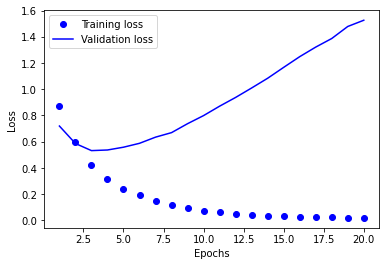

In [19]:
import matplotlib.pyplot as plt

epochs = range(1, 21)
plt.plot(epochs, base_history.history['loss'], "bo", label='Training loss')
plt.plot(epochs, base_history.history['val_loss'], "b", label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Vemos que nas primeiras epochs o erro da validação está decrescendo, mas logo começa a subir rapidamente, enquanto o loss do treino continua em queda. Nesse momento começamos a ter overfit.

É possível ver que o loss do treino quase chega a zero em 20 epochs.

Vamos agora adicionar as regularizações e comparar seus efeitos no modelo.

In [20]:
from tensorflow.keras import regularizers

l1l2_model = Sequential(name='L1L2')
l1l2_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
l1l2_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
l1l2_model.add(Dense(3, activation='softmax'))

l1l2_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

l1l2_history = l1l2_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=0)

Vamos agora criar um modelo só com dropout

In [21]:
drop_out_model = Sequential(name='Dropout')
drop_out_model.add(Dense(64, activation='relu'))
drop_out_model.add(Dropout(0.5))
drop_out_model.add(Dense(64, activation='relu'))
drop_out_model.add(Dropout(0.2))
drop_out_model.add(Dense(3, activation='softmax'))

drop_out_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

drop_out_history = drop_out_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=0)

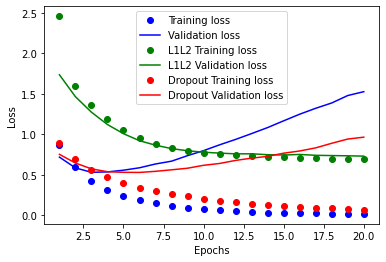

In [22]:
epochs = range(1, 21)
plt.plot(epochs, base_history.history['loss'], "bo", label='Training loss')
plt.plot(epochs, base_history.history['val_loss'], "b", label='Validation loss')
plt.plot(epochs, l1l2_history.history['loss'], "go", label='L1L2 Training loss')
plt.plot(epochs, l1l2_history.history['val_loss'], "g", label='L1L2 Validation loss')
plt.plot(epochs, drop_out_history.history['loss'], "ro", label='Dropout Training loss')
plt.plot(epochs, drop_out_history.history['val_loss'], "r", label='Dropout Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Early stopping (“Parada Antecipada” ou “Parada Precoce”)

Como sabemos, o overfit acontece quando o erro no conjunto de validação começa a aumentar enquanto no treino continua a diminuir. O que o Early Stopping faz é observar após cada época como está a performance do modelo no conjunto de validação e se ela deixa de diminuir o modelo para de ser treinado.

Para evitar de parar o modelo muito cedo, o que geralmente fazemos é observar se a performance do modelo não diminui por algum tempo.

<img src=https://miro.medium.com/max/875/1*iAK5uMoOlX1gZu-cSh1nZw.png width=400>

Vamos ver como utilizar o Early Stopping no modelo com dropout:

In [23]:
from gc import callbacks
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=3)

es_model = Sequential(name='Early_Stopping')
es_model.add(Dense(64, activation='relu'))
es_model.add(Dropout(0.5))
es_model.add(Dense(64, activation='relu'))
es_model.add(Dropout(0.2))
es_model.add(Dense(3, activation='softmax'))

es_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

es_history = es_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=0, callbacks=es)

In [24]:
epochs_es = range(1, len(es_history.history['loss'])+1)

In [25]:
epochs_es

range(1, 9)

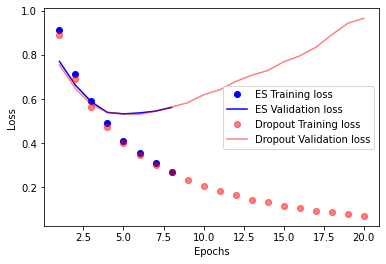

In [26]:
epochs = range(1, 21)
plt.plot(epochs_es, es_history.history['loss'], "bo", label='ES Training loss')
plt.plot(epochs_es, es_history.history['val_loss'], "b", label='ES Validation loss')
plt.plot(epochs, drop_out_history.history['loss'], "ro", label='Dropout Training loss', alpha=0.5)
plt.plot(epochs, drop_out_history.history['val_loss'], "r", label='Dropout Validation loss', alpha=0.5)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Simplificar o modelo

Assim como nos modelos clássicos, modelos mais complexos, ou seja, com mais parâmetros a serem treinados, tem mais chance de overfitar.

In [27]:
simple_model = Sequential(name='simple_model')
simple_model.add(Dense(6, activation='relu'))
simple_model.add(Dense(4, activation='relu'))
simple_model.add(Dense(3, activation='softmax'))

simple_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

simple_history = simple_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=1)

Epoch 1/20
19/19 [==============================] - 1s 36ms/step - loss: 0.9785 - accuracy: 0.6255 - val_loss: 0.8987 - val_accuracy: 0.6236
Epoch 2/20
19/19 [==============================] - 1s 27ms/step - loss: 0.8451 - accuracy: 0.6278 - val_loss: 0.8252 - val_accuracy: 0.6236
Epoch 3/20
19/19 [==============================] - 0s 25ms/step - loss: 0.7733 - accuracy: 0.6332 - val_loss: 0.7816 - val_accuracy: 0.6334
Epoch 4/20
19/19 [==============================] - 1s 27ms/step - loss: 0.7209 - accuracy: 0.6529 - val_loss: 0.7504 - val_accuracy: 0.6415
Epoch 5/20
19/19 [==============================] - 1s 26ms/step - loss: 0.6791 - accuracy: 0.6719 - val_loss: 0.7264 - val_accuracy: 0.6526
Epoch 6/20
19/19 [==============================] - 0s 24ms/step - loss: 0.6437 - accuracy: 0.6978 - val_loss: 0.7060 - val_accuracy: 0.6662
Epoch 7/20
19/19 [==============================] - 0s 25ms/step - loss: 0.6124 - accuracy: 0.7199 - val_loss: 0.6913 - val_accuracy: 0.6756
Epoch 8/20
19

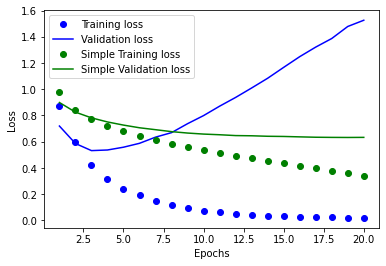

In [28]:
epochs = range(1, 21)
plt.plot(epochs, base_history.history['loss'], "bo", label='Training loss')
plt.plot(epochs, base_history.history['val_loss'], "b", label='Validation loss')
plt.plot(epochs, simple_history.history['loss'], "go", label='Simple Training loss')
plt.plot(epochs, simple_history.history['val_loss'], "g", label='Simple Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Normalização do batch

A normalização em lote é um recurso que adicionamos entre as camadas da rede neural para normalizá-la usando média=0, padrão dev=1 (μ=0,σ=1) antes de enviá-la para a próxima camada. Essa normalização tem o efeito de estabilizar a rede neural e manter a distribuição dos dados, evitando valores muito grandes e muitos pequenos.

Outro efeito da normalização do batch é o treinamento mais rápido, já que agora é possível utilizarmos valores mais altos para o learning rate, além de aumentar a precisão do modelo.

<img src=https://149695847.v2.pressablecdn.com/wp-content/uploads/2020/07/batch_normalization.png width=500>


https://analyticsindiamag.com/hands-on-guide-to-implement-batch-normalization-in-deep-learning-models/

In [29]:
from tensorflow.keras.layers import BatchNormalization

bn_model = Sequential(name='BN')
bn_model.add(Dense(64, activation='relu'))
bn_model.add(BatchNormalization())
bn_model.add(Dense(64, activation='relu'))
bn_model.add(BatchNormalization())
bn_model.add(Dense(3, activation='softmax'))

bn_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

bn_history = bn_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=0)

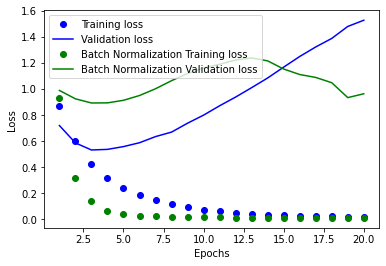

In [30]:
epochs = range(1, 21)
plt.plot(epochs, base_history.history['loss'], "bo", label='Training loss')
plt.plot(epochs, base_history.history['val_loss'], "b", label='Validation loss')
plt.plot(epochs, bn_history.history['loss'], "go", label='Batch Normalization Training loss')
plt.plot(epochs, bn_history.history['val_loss'], "g", label='Batch Normalization Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Aumentar o tamanho da base de treino
Isso pode ser feito adquirindo novos dados ou criando novos dados artificialmente (data augmentation).

<img src=https://amitness.com/images/nlp-aug-bert-augmentations.png width=500>

Exemplos de data augmentation em NLP: https://www.analyticsvidhya.com/blog/2022/02/text-data-augmentation-in-natural-language-processing-with-texattack/

___
___

## Bibliografia e Aprofundamento

https://towardsdatascience.com/handling-overfitting-in-deep-learning-models-c760ee047c6e

https://analyticsindiamag.com/hands-on-guide-to-implement-batch-normalization-in-deep-learning-models/

[Exemplos de data augmentation em NLP](https://www.analyticsvidhya.com/blog/2022/02/text-data-augmentation-in-natural-language-processing-with-texattack/)

[Vanishing Gradient explained using Code!](https://www.youtube.com/watch?v=wTyZqtJyp5g)

[Investigando o problema de vanishing gradient](https://neptune.ai/blog/vanishing-and-exploding-gradients-debugging-monitoring-fixing)

___
___

## Exercício:

Retreine o modelo do exercício da aula anterior adicionando algumas regularizações vistas nessa aula.

___
___

In [31]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

In [32]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) # num_words=10000 restringe os dados as 10.000 palavras mais frequentes encontradas nos dados

In [37]:
# prepare data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    """Multi-hot encode your lists to turn them into vectors of 0s and 1s. This would
    mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vec-
    tor that would be all 0s except for indices 8 and 5, which would be 1s. Then you
    could use a Dense layer, capable of handling floating-point vector data, as the
    first layer in your model"""
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [34]:
# encode labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [38]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

base_model = Sequential(name='Baseline_model')
base_model.add(Dense(64, activation='relu'))
base_model.add(Dense(64, activation='relu'))
base_model.add(Dense(3, activation='softmax'))

base_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

base_history = base_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=1)

ValueError: Data cardinality is ambiguous:
  x sizes: 9369
  y sizes: 8982
Make sure all arrays contain the same number of samples.